In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Kinds of Matrices

There are many forms of matrices that you will encounter in not just Linear Algebra, but also in Computational Neuroscience/Cognitive Science. Matrices here will be expressed as having dimensions  [m x n], where m is the number of rows, and n the number of columns.

## Square Matrices
The first one to talk about are square matrices. Can you guess why they are called square?

They have the same number of rows as columns: [m x m], or m = n.

The way the math works out, this means that the output of matrix multiplication will have the dimensions as the input. This is important! Let's review some important ones.

### Identity Matrices
You know how in math it's important to have an operation that whose output is the same as the input? In regular algebra this is the number '1'. In linear algebra this is the Identity Matrix. It is a square matrix whose entries are all zero except along the diagonal. Note: The usual notation for the identity is I.

Bonus points if you can guess what number lies along the diagonal.

To create one in python we use the eye() function, specifying the size.

It is often useful to look at the values of your matrices when possible. You can do this by a) printing it, or if the matrix is too large, b) calling the plt.imshow() function. This creates a 2D heatmap.

Below, create a 10 x 10 Identity matrix.

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


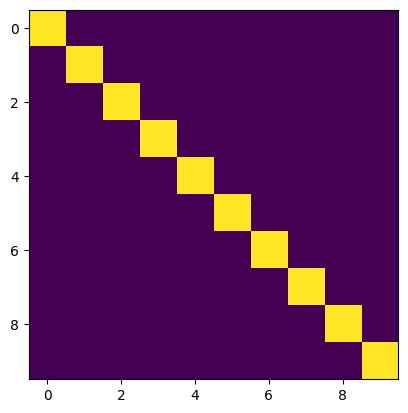

In [ ]:
# Initialize the Identity
I =  np.eye(10)  # YOUR CODE HERE

# Print the values
print(I)

# Plot it as a 2d image.
plt.imshow(I)


To show that this works, we'll plot a bunch of 2D points represented by a data matrix of size [2 x n_data_points], multiplied by the identity of the appropriate size (m = 2).

Text(0.5, 1.0, 'Output')

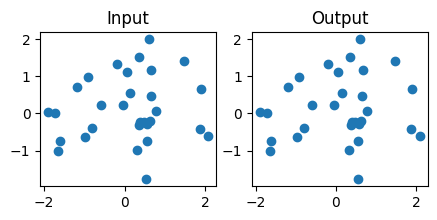

In [ ]:
n_data_points = 30
input = np.random.randn(2, n_data_points)

# 2x2 Identity matrix
I =  np.eye(30)

output =  input @ I

# Plot input output
fig, axs = plt.subplots(1, 2, figsize = [5, 2])
axs[0].scatter(input[0, :], input[1, :])
axs[1].scatter(output[0, :], output[1, :])

axs[0].set_title("Input")
axs[1].set_title("Output")


### Scaling Matrices
These matrices take the input and stretches or shrinks the input. This scaling operates on the coordinate axes. So with 2D points, this equates to squashing or stretching the x and y axis by some amount.

To create a scaling matrix, start with an Identity. Then, for each diagonal 1, change it to a number you'd like to change the corresponding axis by. So for 2D scaling matrix that scales the x by 2 and shrinks the y by 1/2, you get:

[[2.  0. ]
 [0.  0.5]]


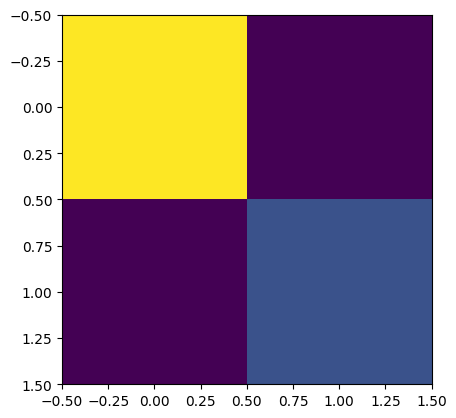

In [ ]:
# Copy the I matrix
I = np.eye(2)
S = I.copy()

# Change the diagonal entries
S[0, 0] = 2   # stretch the first dimension (x) by 2
S[1, 1] = 0.5 # squash the second dimension by 1/2
print(S)
plt.imshow(S)

Applying this scaling matrix S to our 2D data input, we get:

Text(0.5, 1.0, 'Output')

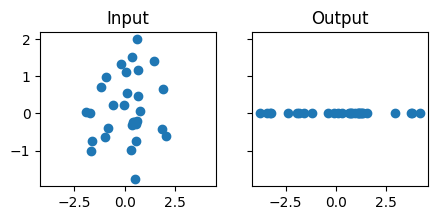

In [ ]:
# Copy the I matrix
S = I.copy()

# Change the diagonal entries
S[0, 0] =  2
S[1, 1] = 0

output = S @ input

# Plot input output
# I use sharex and sharey here to guarantee that the axes marks are shared
fig, axs = plt.subplots(1, 2, figsize = [5, 2], sharex = True, sharey = True)
axs[0].scatter(input[0, :], input[1, :])
axs[1].scatter(output[0, :], output[1, :])

axs[0].set_title("Input")
axs[1].set_title("Output")

See what happens to the data when you change the diagonals yourself! Set the diagonal entries of S to other values and see how the resulting output compares to the input.

How can this operation be reversed to get the output back to the input?

What happens when one of the entries are set to 0? Is this reversible?

### Rotation (Orthogonal) Matrices

As you can probably infer, these matrices have the ability to rotate the input. Technically this also includes the ability to flip the input along one or more dimensions (i.e. make all the x values negative, flipping the data points around the y axis).

The way to design these matrices is not the most intuitive. But they all have an additional requirement:

1.  Each column vector in the matrix must be orthogonal to each other column
2.  Each column vector's length must equal 1 (unit vector)

In 2D this is relatively easy to set up.  

First, based on what you did with the scaling matrices, how might you flip one or more axes?


Text(0.5, 1.0, 'Output')

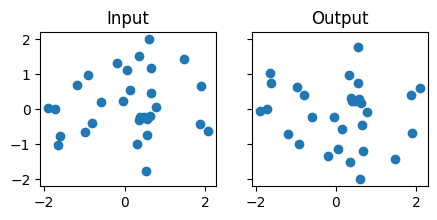

In [ ]:
# Copy the I matrix
F = I.copy()

# Change the diagonal entries
''' YOUR CODE HERE '''
F[0, 0] = 1
F[1, 1] = -1

output = F @ input

# Plot input output
# I use sharex and sharey here to guarantee that the axes marks are shared
fig, axs = plt.subplots(1, 2, figsize = [5, 2], sharex = True, sharey = True)
axs[0].scatter(input[0, :], input[1, :])
axs[1].scatter(output[0, :], output[1, :])

axs[0].set_title("Input")
axs[1].set_title("Output")

To rotate 2D input, the rotation matrix R takes an easy form:

$$
R = \begin{bmatrix}\cos \theta &-\sin \theta \\\sin \theta &\cos \theta \end{bmatrix}
$$

Where Θ refers to the angle (in radians) to rotate the input by.

Text(0.5, 1.0, 'Output')

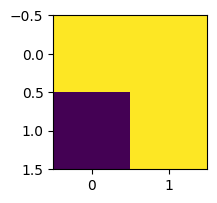

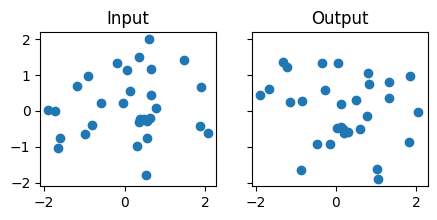

In [ ]:
# Rotate Counter-clockwise by 45°
theta =  np.radians(-45)

R = np.asarray(
    [[ np.cos(theta), -np.sin(theta)],
     [ np.sin(theta), np.cos(theta)]]
    )

plt.imshow(R)
plt.gcf().set_size_inches(2, 2)

output =  R @ input

# Plot input output
# I use sharex and sharey here to guarantee that the axes marks are shared
fig, axs = plt.subplots(1, 2, figsize = [5, 2], sharex = True, sharey = True)
axs[0].scatter(input[0, :], input[1, :])
axs[1].scatter(output[0, :], output[1, :])

axs[0].set_title("Input")
axs[1].set_title("Output")

Can you change the above code to get the input to rotate **clockwise** by 25°?

## Chaining together matrix multiplications

An important note is that you can stack these matrix operations. To do so, remember that in Linear algebra, the math works out from **right to left**. For example, with input vector $\vec{x}$:
$$
SR\vec{x}
$$

First, R is applied to $\vec{x}$, and then S is applied to whatever comes out of that. It sometimes works in reverse but not always. So its safe to make sure the math is done right to left.

Here's a challenge, create three matrices:

1.   Takes the input and rotates it by 45° **clockwise**, (matrix we'll call V)
2.   Takes the input, scales the first dimension by 1.5, and scale the second dimension by 0 (i.e. deletes it).
3.   Takes the input and rotates it back by 45 ° **counterclockwise** (matrix we'll call U)

Then take the input from the previous cells, and operate on that input ***in that order*** (here the input is written as A, the output written as B):
$$
USVA = B
$$



Text(0.5, 1.0, 'Output')

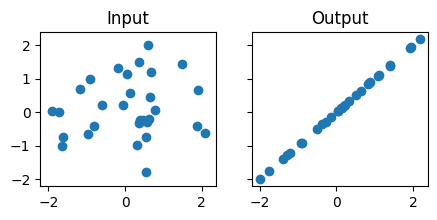

In [ ]:
# Rotate clockwise by 45°
theta =  np.radians(-45)
'''YOUR CODE HERE'''
V = np.asarray(
    [[ np.cos(theta), -np.sin(theta)],
     [ np.sin(theta), np.cos(theta)]]
    )

# Scale dim1 by 1.5, dim2 by 0
S = np.zeros([2, 2])
S[0, 0] =  1.5
S[1, 1] =  0

# Rotate counter-clockwise by 45°
U = np.asarray(
    [[ np.cos(-theta), -np.sin(-theta)],
     [ np.sin(-theta), np.cos(-theta)]]
    )

# Write out the math, remember the proper order and to use the matrix multiply operator @
output =  U @ S @ V @ input
'''YOUR CODE STOPS HERE'''

# Plot input output
# I use sharex and sharey here to guarantee that the axes marks are shared
fig, axs = plt.subplots(1, 2, figsize = [5, 2], sharex = True, sharey = True)
axs[0].scatter(input[0, :], input[1, :])
axs[1].scatter(output[0, :], output[1, :])

axs[0].set_title("Input")
axs[1].set_title("Output")

If your code works out above, then below you can see how each matrix transforms the data at each stage of the multiplication:

Text(0.5, 1.0, 'USV input (output)')

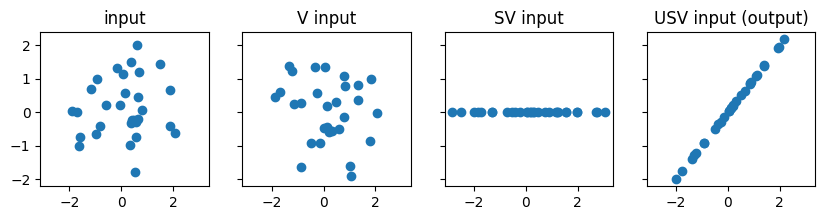

In [ ]:
fig, axs = plt.subplots(1, 4, sharex = True, sharey = True, figsize = [10, 2])

# input
axs[0].scatter(input[0, :], input[1, :])
axs[0].set_title("input")
# V input
axs[1].scatter((V @ input)[0, :], (V @ input)[1, :])
axs[1].set_title("V input")
# SV input
axs[2].scatter((S @ V @ input)[0, :], (S @ V @ input)[1, :])
axs[2].set_title("SV input")
# USV input
axs[3].scatter((U @ S @ V @ input)[0, :], (U @ S @ V @ input)[1, :])
axs[3].set_title("USV input (output)")


The use of U, S, and V here is no accident.

This will be important later on. So, try to spend some time understanding what these series of operations are doing to the set of data points.

## Permutation Matrices

These matrices shuffle around the order of things in a matrix. This is paritcularly useful for statistical analyses.

Text(0.5, 1.0, 'Data with shuffled Y')

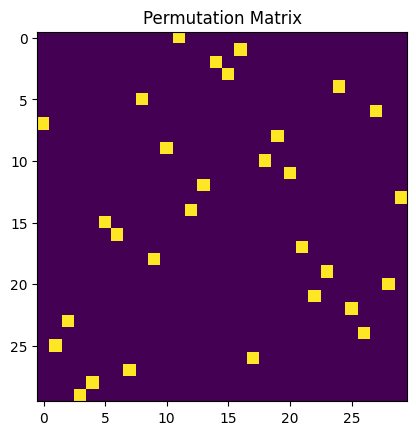

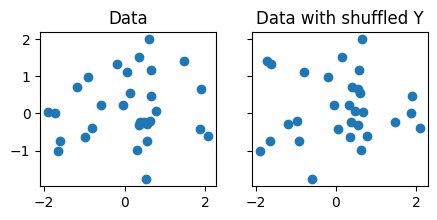

In [ ]:
shuffled_indexes = np.random.permutation(n_data_points)

P = np.eye(n_data_points)

P = np.asarray([P[idx] for idx in shuffled_indexes])

plt.imshow(P)
plt.title("Permutation Matrix")

x = input[0]
y = input[1]

y_p = P @ y

fig, axs = plt.subplots(1, 2, figsize = [5, 2], sharex = True, sharey = True)
axs[0].scatter(x, y)
axs[1].scatter(x, y_p)

axs[0].set_title("Data")
axs[1].set_title("Data with shuffled Y")


## Sampling Matrices

Sometimes you may want to downsample a signal. For example, say you have a 128 second long signal, recorded at 1 Hz. This means you have a 128-long vector, where the ith element is the signal at the ith second of the recording. Let's say you want to compress it. A quick thing to do is to grab every other second of the signal and save that.

Now you could loop through each second, check hether the i is even, and store it. But that's inefficient. We can use linear algebra here. Before moving on, it helps to take a second to imagine how to build a matrix to do this. Hint: use component selectors, like in a permutation.

Below I've generated a 128-s signal made up of two sinusoids of different frequencies, sampled at 1 Hz.

Text(0.5, 0, 'seconds')

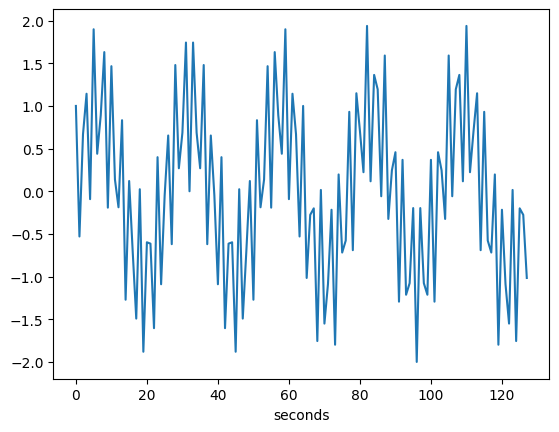

In [ ]:
timepoints = np.arange(128)
ks = [5, 50]
signal = np.sin(timepoints * 2 * ks[0] * np.pi/ 128) + np.cos(timepoints * 2 * ks[1] * np.pi/ 128)

plt.plot(signal)
plt.xlabel("seconds")

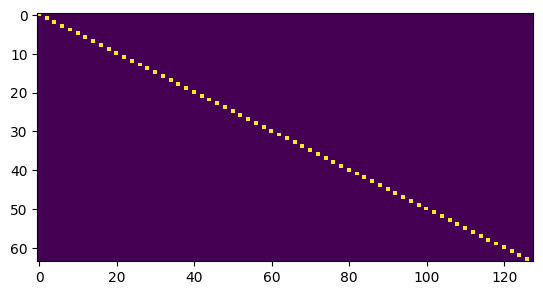

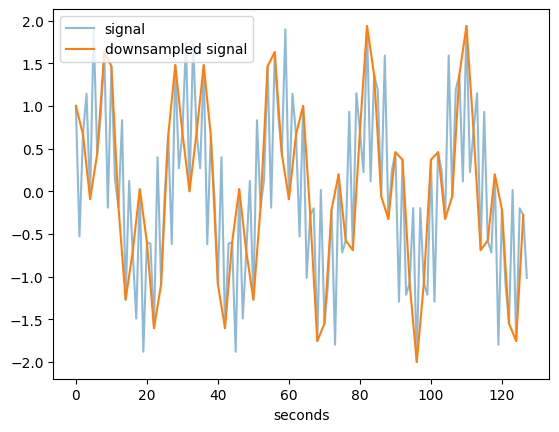

In [ ]:
D = np.zeros([int(128/2), 128])

for i in range(64):
  D[i, i*2] = 1

plt.imshow(D)
plt.show()

plt.plot(signal, alpha = 0.5, label = 'signal')
plt.plot(np.arange(0, 128, 2), D @ signal, label = 'downsampled signal')
plt.xlabel("seconds")
plt.legend()


Some things to note:
1) Upsampling can also be done with a matrix operation. There are many ways to set up a matrix (or set of matrices) to do this. I leave this as an exercise for the reader

2) Downsampling a signal this sbasic way will usually give you a signal that does not capture well the original signal.

2) Downsampling on its own can lead to aliasing. This is a problem in signal processing, and can be seen in the downsampled signal above. I've plotted below a different, simpler signal, and its downsampled version, so you can clearly see the effects of aliasing.


In [ ]:
timepoints = np.arange(128)
ks = [31]
signal = np.sin(timepoints * 2 * ks[0] * np.pi/ 128)


plt.plot(signal, alpha = 0.5, label = 'signal')
plt.plot(np.arange(0, 128, 2), D @ signal, label = 'downsampled signal')
plt.xlabel("seconds")
plt.legend()


Notice how the downsampled signal is following a trend that is a far cry from the original signal?

This is solved by blurring the signal before downsampling.

Doing so creates a lower resolution version of the original signal that better captures the original signal.

Well whatya know — blurring is also a matrix operation, one called ***convolution***

We won't go into it here, but if you are interested, check the 3b1b video:
https://youtu.be/IaSGqQa5O-M?si=GQWiu0dYv3YMZuEm


# Important Matrices in Linear Algebra

### Transpose

The tranpose of any matrix is what happens when you flip the matrix along its diagonal. What this means is that the rows become the columns, and the columns become the rows. Specifically, the ith row of matrix M becomes the ith column of M transpose. We use the superscript T to signify the transpose operation:

$$
M^T_{ji} = M_{ij}
$$

Where the size of $M$ is  {m x n} and the size of $M^T$ is {n x m}

Note:
1) The transpose of a square diagonal matrix is itself
$$
S^T = S
$$
2) The transpose of a rotation matrix creates a matrix that does the exact opposite rotation. Chaining a rotation ($R$) and its reverse rotation ($R^T$) matrix together on a vector rotates the vector, and then rotates it back.
$$
RR^T\vec{v}=\vec{v}
$$

In python, we use '.T' to transpose a matrix.

Exercise:

1. Transpose the scaling matrix $S$. Plot $S$ and $S^T$

In [ ]:
# YOUR CODE HERE

2. Transpose the rotation matrix $U$. Plot $U$ and $U^T$. Do the same for V.

In [ ]:
# YOUR CODE HERE

3. Transpose the data matrix. Plot the original data matrix with plt.scatter. Then do the same on a separate plot for the transose of the data matrix.

In [ ]:
# YOUR CODE HERE

### Inverse
In regular algebra we have the divide operation. In linear algebra, regular division doesn't make sense. However, we still need some kind of method that effectively accomplishes a similar idea.

To do this, we rely on the property in math that a number divided by itself is 1. This is a simple, but important, property of division. This can also be thought of multiplying a number by its inverse:
$$
x * \dfrac{1}{x} = 1
$$
and, therefore, for some number $n$
$$
x * \dfrac{1}{x} * n = n
$$


There is a similar property in linear algebra. Specifically, the ***inverse*** of a matrix is one where if you multiply the matrix and its inverse togeter, it equals the identity. Remember, the Identity ($I$) is the linear algebra equivalent of 1 (where multiplying something by one returns the same thing).  In mathematical notation, the inverse is denoted with the superscript -1:
$$
MM^{-1} = I \\
$$

In python, we use the np.linalg.inv()  or np.linalg.pinv() function.

so, when applying this sequence to an input vector $\vec{v}$, we get the vector $\vec{v}$ back:
$$
MM^{-1}\vec{v} = I\vec{v} = \vec{v}
$$

Wait a minute, this looks familiar! Take a moment to look at the transpose section. Where did this kind of property also pop up?

...
Scroll down if you can't figure it out.

### Exercise:

1. Take the inverse of R, what does it look like? Then, apply the inverse to R. What does the output look like?

For rotation matrices, and more precisely orthonormal matrices, their transpose ***is*** their inverse. This is because each column in an orthonormal matrix is both orthogonal to every other column, and is normalized to sum to one.

This may be a bit detailed, but remember, orthogonal vectors mean that their dot product equals 0. Because every column is orthogonal to every column, then every dot product between each pair of columns equals zero. ***Except*** for a pair of the same column, which equals one because they equal each other and they are unit vectors (lengths = 1):

if i != j
$$
\vec{M_i} ^T \vec{M_j} = 0
$$
if i == j
$$
\vec{M_i} ^T \vec{M_j} = 1
$$

And remember:  matrix multiplication is taking the dot product between each pair of rows and columns. To help visualize this, I've plotted the previously generated Rotation matrix (R), its transpose, and their product below — labeling the x and y axis by their row and column index.



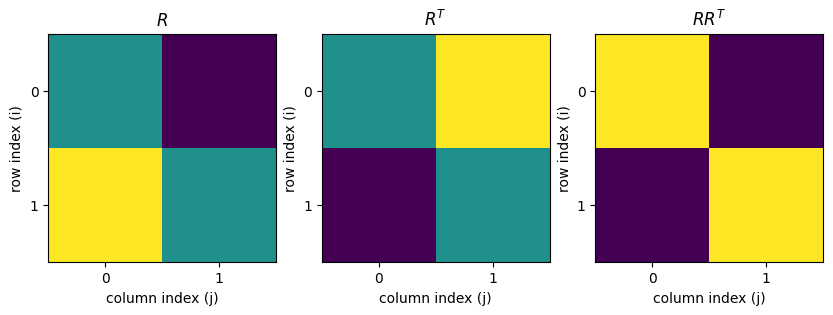

In [ ]:
fig, axs = plt.subplots(1, 3, figsize = [10, 3], sharex = True, sharey=False)
axs[0].imshow(R)
axs[1].imshow(R.T)
axs[2].imshow(R@R.T)

axs[0].set_xticks([0, 1])
axs[0].set_yticks([0, 1])
axs[1].set_yticks([0, 1])
axs[2].set_yticks([0, 1])

axs[0].set_title("$R$")
axs[1].set_title("$R^T$")
axs[2].set_title("$RR^T$")

for i in range(3):
  axs[i].set_ylabel("row index (i)")
  axs[i].set_xlabel("column index (j)")


The same a applies for orthonormal matrices of any size.


However, to obtain the inverse of a non-orthonormal matrix you can call the .inv() function from numpy's linear algebra library.

**NOTE:** The matrix must be square for the inverse function to work.

### Exercise:
1. Fill in the code below to compute the inverse of the random matrix A.

In [ ]:
size = 10
A = np.random.randn(size, size)
A_inv =  # YOUR CODE HERE

fig, axs = plt.subplots(1, 3, figsize = [10, 3], sharex = True, sharey=False)
axs[0].imshow(A)
axs[1].imshow(A_inv)
axs[2].imshow(A@A_inv)

axs[0].set_xticks(range(size))
axs[0].set_yticks(range(size))
axs[1].set_yticks(range(size))
axs[2].set_yticks(range(size))

axs[0].set_title("$A$")
axs[1].set_title("$A^{-1}$")
axs[2].set_title("$AA^{-1}$")

for i in range(3):
  axs[i].set_ylabel("row index (i)")
  axs[i].set_xlabel("column index (j)")

### And the Pseudo-inverse

For matrices that ***are not*** square, the inverse doesn't really work. This is because the number of rows don't match the number of columns in rectangular matrices.  And, the pseudoinverse of a matrix has the same shape as the transpose of the matrix.

 $\dagger$ and * are common ways to denote a pseudoinverse in math notation.

So for a matrix B {m x n} where m != n:
$$
BB^{†} \neq B^{\dagger}B
$$

For a matrix of B of size {5 x 2}, take a moment to think of what the size of the output should be for the two different kinds of pseudoinverse multiplications. Will they produce matrices of the same, or different, sizes?

### Exercise
1. Fill in the code below to plot $BB^{†}$ in subplot 1, and $B^{†}B$ in subplot 2.

In [ ]:
m, n = 50, 25

B = np.random.randn(m, n)

B_pinv = np.linalg.pinv(B)

fig, axs = plt.subplots(1, 2, figsize = [10, 5])

axs[0].imshow(# YOUR CODE HERE)
axs[1].imshow(# YOUR CODE HERE)

axs[0].set_title("$B^{\dagger} B$")
axs[1].set_title("$BB^{\dagger}$")

Experiment a bit: Try changing the ratio between m and n. What happens to $BB^{\dagger}$ as they get closer? Farther? Specifically to how it relates to the identity.